# Lab 05 - Bài tập

In [1]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy:

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [2]:
# a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi
import random

def simulate_tests(num_tests=10):
    correct_count = 0
    for _ in range(num_tests):
        correct_answers = 0
        for _ in range(10):  # 10 câu hỏi
            if random.random() < 0.25:  # Xác suất chọn đúng
                correct_answers += 1
        correct_count += correct_answers
    return correct_count

# In ra số câu đúng của sinh viên trong 10 lần kiểm tra
print(simulate_tests())

28


In [3]:
from scipy.stats import binom

# Số câu hỏi
n = 10
# Xác suất đúng cho mỗi câu (1/4)
p = 0.25

# Xác suất để có 3 câu đúng (k = 3)
k = 3
prob_4_points = binom.pmf(k, n, p)
print(f"Xác suất để sinh viên này được 4 điểm là: {prob_4_points:.4f}")


Xác suất để sinh viên này được 4 điểm là: 0.2503


In [ ]:
# Tính E(X) và Var(X)
E_X = n * p
Var_X = n * p * (1 - p)

print(f"E(X) = {E_X:.2f}")
print(f"Var(X) = {Var_X:.2f}")


E(X) = 2.50
Var(X) = 1.88


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [2]:
import math

# Hàm tính xác suất theo phân phối Poisson
def poisson_probability(lmbda, k):
    return (lmbda ** k) * math.exp(-lmbda) / math.factorial(k)

# Tham số lambda (số cuộc gọi trung bình mỗi phút)
lmbda = 3

# Tính xác suất cho 1, 2, và 3 cuộc gọi
p_1_call = poisson_probability(lmbda, 1)
p_2_calls = poisson_probability(lmbda, 2)
p_3_calls = poisson_probability(lmbda, 3)

# In kết quả
print(f"Xác suất nhận được 1 cuộc gọi: {p_1_call:.4f}")
print(f"Xác suất nhận được 2 cuộc gọi: {p_2_calls:.4f}")
print(f"Xác suất nhận được 3 cuộc gọi: {p_3_calls:.4f}")


Xác suất nhận được 1 cuộc gọi: 0.1494
Xác suất nhận được 2 cuộc gọi: 0.2240
Xác suất nhận được 3 cuộc gọi: 0.2240


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.
b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu
d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [3]:
import scipy.stats as stats

#a. Hãy tính tỷ lệ của mỗi loại
# Tham số phân phối
mu = 500
sigma = 4

# Tính xác suất cho từng loại
p_loai_1 = 1 - stats.norm.cdf(505, mu, sigma)
p_loai_2 = stats.norm.cdf(505, mu, sigma) - stats.norm.cdf(495, mu, sigma)
p_loai_3 = stats.norm.cdf(495, mu, sigma)

# In kết quả
print(f"Tỷ lệ loại 1 (trên 505 gam): {p_loai_1:.4f}")
print(f"Tỷ lệ loại 2 (từ 495 đến 505 gam): {p_loai_2:.4f}")
print(f"Tỷ lệ loại 3 (dưới 495 gam): {p_loai_3:.4f}")


Tỷ lệ loại 1 (trên 505 gam): 0.1056
Tỷ lệ loại 2 (từ 495 đến 505 gam): 0.7887
Tỷ lệ loại 3 (dưới 495 gam): 0.1056


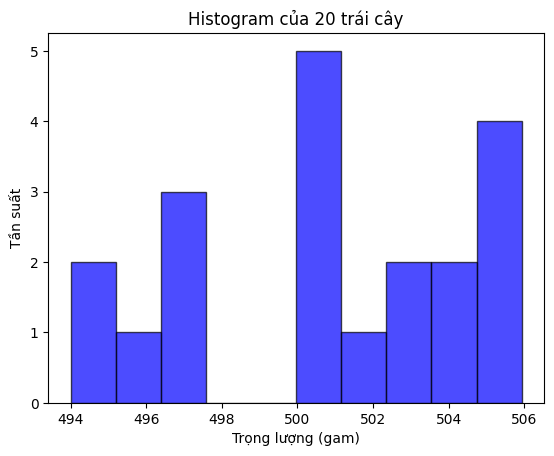

Trung bình (20 trái cây): 500.82
Độ lệch chuẩn (20 trái cây): 3.67


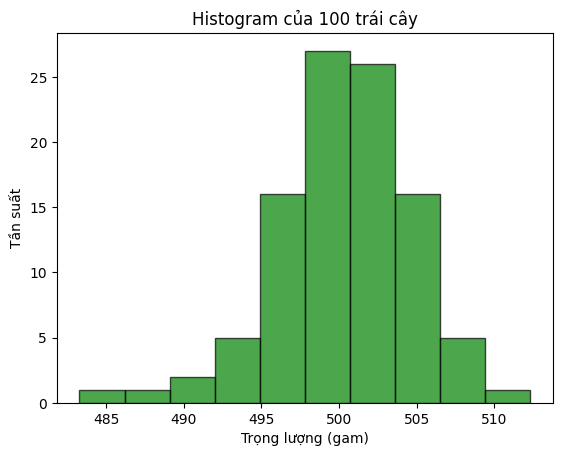

Trung bình (100 trái cây): 500.28
Độ lệch chuẩn (100 trái cây): 4.44


In [4]:
import numpy as np
import matplotlib.pyplot as plt

#b. Bạn hãy mô phỏng lấy mẫu 20 trái cây trên
# Mô phỏng lấy mẫu 20 trái cây
samples_20 = np.random.normal(mu, sigma, 20)

# Vẽ histogram cho 20 trái cây
plt.hist(samples_20, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram của 20 trái cây')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Tần suất')
plt.show()

# Tính trung bình và độ lệch chuẩn của 20 trái cây
mean_20 = np.mean(samples_20)
std_20 = np.std(samples_20, ddof=1)
print(f"Trung bình (20 trái cây): {mean_20:.2f}")
print(f"Độ lệch chuẩn (20 trái cây): {std_20:.2f}")

# Mô phỏng lấy mẫu 100 trái cây
samples_100 = np.random.normal(mu, sigma, 100)

# Vẽ histogram cho 100 trái cây
plt.hist(samples_100, bins=10, alpha=0.7, color='green', edgecolor='black')
plt.title('Histogram của 100 trái cây')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Tần suất')
plt.show()

# Tính trung bình và độ lệch chuẩn của 100 trái cây
mean_100 = np.mean(samples_100)
std_100 = np.std(samples_100, ddof=1)
print(f"Trung bình (100 trái cây): {mean_100:.2f}")
print(f"Độ lệch chuẩn (100 trái cây): {std_100:.2f}")


**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [ ]:
import numpy as np

# Mô phỏng tung xúc xắc 5000 lần
np.random.seed(42)  # Đặt seed để tái tạo kết quả
dice_rolls = np.random.randint(1, 7, 5000)  # Tung xúc xắc, các giá trị từ 1 đến 6

# Phần a: Xác suất để số chấm xuất hiện là 4
count_4 = np.sum(dice_rolls == 4)
p_4 = count_4 / 5000
print(f"Xác suất để số chấm xuất hiện là 4: {p_4:.4f}")

# Phần b: Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4
count_gte_4 = np.sum(dice_rolls >= 4)
p_gte_4 = count_gte_4 / 5000
print(f"Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4: {p_gte_4:.4f}")

# Phần c: Xác suất để mặt 6 chấm xuất hiện, biết rằng số chấm lớn hơn hoặc bằng 4
count_6_given_gte_4 = np.sum(dice_rolls[dice_rolls >= 4] == 6)
p_6_given_gte_4 = count_6_given_gte_4 / count_gte_4
print(f"Xác suất để mặt 6 chấm xuất hiện, biết rằng số chấm >= 4: {p_6_given_gte_4:.4f}")


Xác suất để số chấm xuất hiện là 4: 0.1684
Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4: 0.5030
Xác suất để mặt 6 chấm xuất hiện, biết rằng số chấm >= 4: 0.3264


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

Min: 24
Max: 47
Q1 (25th percentile): 33.0
Q2 (Median): 35.0
Q3 (75th percentile): 37.0


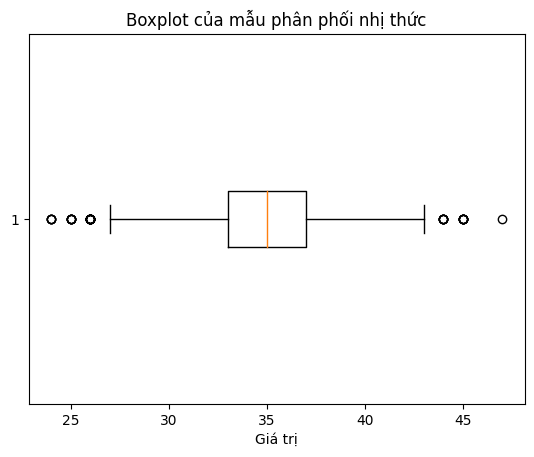

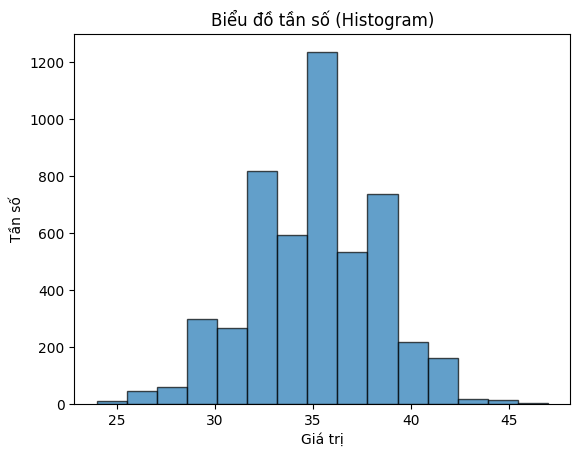

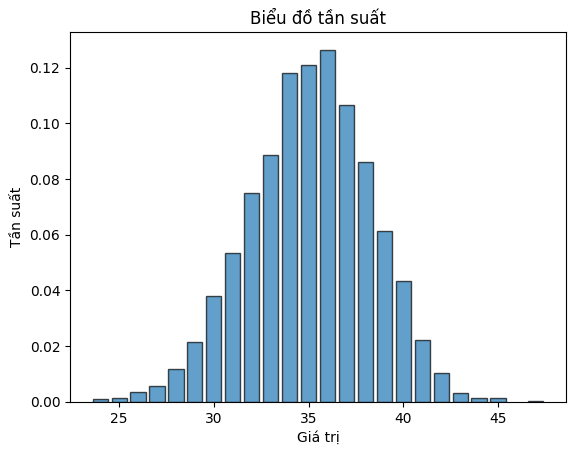

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Phần a: Tạo 5000 số ngẫu nhiên với phân phối nhị thức
n = 50
p = 0.7
samples = np.random.binomial(n, p, 5000)

# Tính các giá trị thống kê: min, max, Q1, Q2, Q3
min_value = np.min(samples)
max_value = np.max(samples)
Q1 = np.percentile(samples, 25)
Q2 = np.median(samples)
Q3 = np.percentile(samples, 75)

# In các giá trị thống kê
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (Median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")

# Phần b: Vẽ boxplot
plt.boxplot(samples, vert=False)
plt.title("Boxplot của mẫu phân phối nhị thức")
plt.xlabel("Giá trị")
plt.show()

# Phần c: Vẽ biểu đồ tần số (Histogram)
plt.hist(samples, bins=15, edgecolor='black', alpha=0.7)
plt.title("Biểu đồ tần số (Histogram)")
plt.xlabel("Giá trị")
plt.ylabel("Tần số")
plt.show()

# Vẽ biểu đồ tần suất (Biểu đồ cột của tỷ lệ)
unique, counts = np.unique(samples, return_counts=True)
relative_frequencies = counts / len(samples)

plt.bar(unique, relative_frequencies, edgecolor='black', alpha=0.7)
plt.title("Biểu đồ tần suất")
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")
plt.show()


**Bài 6**

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

Phần a: Ý nghĩa của câu lệnh binom.pmf(4, 10, 0.6)
binom.pmf(4, 10, 0.6): Đây là hàm khối xác suất (Probability Mass Function - PMF) của phân phối nhị thức (binomial distribution). Hàm này tính xác suất để biến ngẫu nhiên
𝑋
X nhận giá trị cụ thể, ở đây là 4, trong một phân phối nhị thức có các tham số:
𝑛
=
10
n=10 (số lần thử),
𝑝
=
0.6
p=0.6 (xác suất thành công mỗi lần thử).
Cụ thể, câu lệnh này tính xác suất để có đúng 4 lần thành công trong 10 lần thử, khi xác suất thành công mỗi lần thử là 0.6.

In [8]:
import scipy.stats as stats

# Tham số của phân phối nhị thức
n = 10  # Số lần thử
p = 0.6  # Xác suất thành công mỗi lần thử

# Tính các xác suất
P_X_le_5 = stats.binom.cdf(5, n, p)  # P(X <= 5)
P_X_ge_4 = 1 - stats.binom.cdf(3, n, p)  # P(X >= 4)
P_X_eq_5 = stats.binom.pmf(5, n, p)  # P(X = 5)

# In kết quả
print(f"P(X <= 5): {P_X_le_5:.4f}")
print(f"P(X >= 4): {P_X_ge_4:.4f}")
print(f"P(X = 5): {P_X_eq_5:.4f}")


P(X <= 5): 0.3669
P(X >= 4): 0.9452
P(X = 5): 0.2007


In [9]:
# Tham số của phân phối Poisson
lambda_poisson = 3  # Số sự kiện trung bình

# Tính các xác suất
P_X_le_5_poisson = stats.poisson.cdf(5, lambda_poisson)  # P(X <= 5)
P_X_ge_4_poisson = 1 - stats.poisson.cdf(3, lambda_poisson)  # P(X >= 4)
P_X_eq_5_poisson = stats.poisson.pmf(5, lambda_poisson)  # P(X = 5)

# In kết quả
print(f"P(X <= 5) - Poisson: {P_X_le_5_poisson:.4f}")
print(f"P(X >= 4) - Poisson: {P_X_ge_4_poisson:.4f}")
print(f"P(X = 5) - Poisson: {P_X_eq_5_poisson:.4f}")


P(X <= 5) - Poisson: 0.9161
P(X >= 4) - Poisson: 0.3528
P(X = 5) - Poisson: 0.1008


**Bài 7**

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

Phần a: Ý nghĩa của các câu lệnh
norm.cdf(2):

Tính giá trị của hàm phân phối tích lũy (CDF) của phân phối chuẩn tắc (standard normal distribution) tại
𝑥
=
2
x=2.
Điều này có nghĩa là tính xác suất để biến ngẫu nhiên chuẩn tắc
𝑍
≤
2
Z≤2, tức là
𝑃
(
𝑍
≤
2
)
P(Z≤2), với
𝑍
∼
𝑁
(
0
,
1
)
Z∼N(0,1).
norm.cdf(2, 1, 1):

Tính giá trị của hàm phân phối tích lũy của phân phối chuẩn có kỳ vọng (mean)
𝜇
=
1
μ=1 và độ lệch chuẩn (standard deviation)
𝜎
=
1
σ=1 tại
𝑥
=
2
x=2.
Điều này có nghĩa là tính xác suất để biến ngẫu nhiên
𝑋
≤
2
X≤2, tức là
𝑃
(
𝑋
≤
2
)
P(X≤2), với
𝑋
∼
𝑁
(
1
,
1
)
X∼N(1,1).
norm.cdf(2, 1, 2):

Tương tự như trên, nhưng lần này độ lệch chuẩn là
𝜎
=
2
σ=2.
Tính xác suất để
𝑋
≤
2
X≤2, tức là
𝑃
(
𝑋
≤
2
)
P(X≤2), với
𝑋
∼
𝑁
(
1
,
2
)
X∼N(1,2).

In [10]:
import scipy.stats as stats

result_b = stats.norm.ppf(stats.norm.cdf(2))
print(f"Kết quả của norm.ppf(norm.cdf(2)): {result_b}")


Kết quả của norm.ppf(norm.cdf(2)): 2.0000000000000004


norm.ppf(0.975): 1.959963984540054
norm.ppf(0.975, 1, 1): 2.959963984540054
norm.ppf(0.975, 1, 2): 4.919927969080108


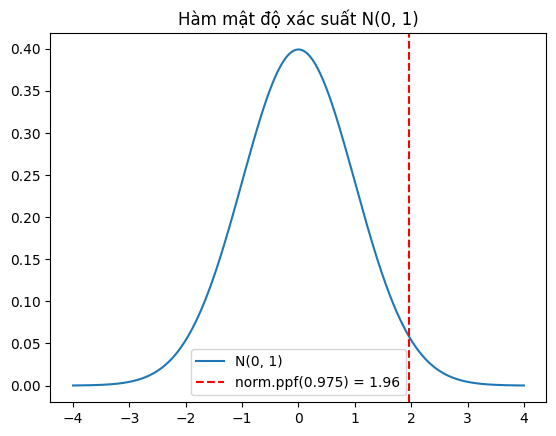

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Tính các giá trị
value_1 = stats.norm.ppf(0.975)
value_2 = stats.norm.ppf(0.975, 1, 1)
value_3 = stats.norm.ppf(0.975, 1, 2)

# In kết quả
print(f"norm.ppf(0.975): {value_1}")
print(f"norm.ppf(0.975, 1, 1): {value_2}")
print(f"norm.ppf(0.975, 1, 2): {value_3}")

# Vẽ hình minh họa
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.plot(x, y, label="N(0, 1)")
plt.axvline(value_1, color='r', linestyle='--', label=f"norm.ppf(0.975) = {value_1:.2f}")
plt.title("Hàm mật độ xác suất N(0, 1)")
plt.legend()
plt.show()


In [12]:
# Tham số của phân phối chuẩn
mu = 24
sigma = 4

# Tính xác suất
P_X_le_20 = stats.norm.cdf(20, mu, sigma)
P_X_ge_29_5 = 1 - stats.norm.cdf(29.5, mu, sigma)

# In kết quả
print(f"P(X <= 20): {P_X_le_20:.4f}")
print(f"P(X >= 29.5): {P_X_ge_29_5:.4f}")
print(f"P(X = 23.8): 0 (Vì xác suất tại một điểm trong phân phối liên tục là 0)")


P(X <= 20): 0.1587
P(X >= 29.5): 0.0846
P(X = 23.8): 0 (Vì xác suất tại một điểm trong phân phối liên tục là 0)


**Bài 8**

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [13]:
import scipy.stats as stats

# Tham số của phân phối chuẩn
mu = 3000
sigma = 3

# Giá trị z cho ngưỡng dưới và ngưỡng trên
z1 = (2993 - mu) / sigma
z2 = (3007 - mu) / sigma

# Tính xác suất P(2993 ≤ X ≤ 3007)
P_within_range = stats.norm.cdf(z2) - stats.norm.cdf(z1)

# Tỷ lệ sản phẩm lỗi
P_outside_range = 1 - P_within_range

# In kết quả
print(f"Xác suất để chi tiết máy nằm trong khoảng 2993 mm đến 3007 mm: {P_within_range:.4f}")
print(f"Tỷ lệ sản phẩm lỗi của công ty: {P_outside_range:.4f}")


Xác suất để chi tiết máy nằm trong khoảng 2993 mm đến 3007 mm: 0.9804
Tỷ lệ sản phẩm lỗi của công ty: 0.0196


**Bài 9**

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm.

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

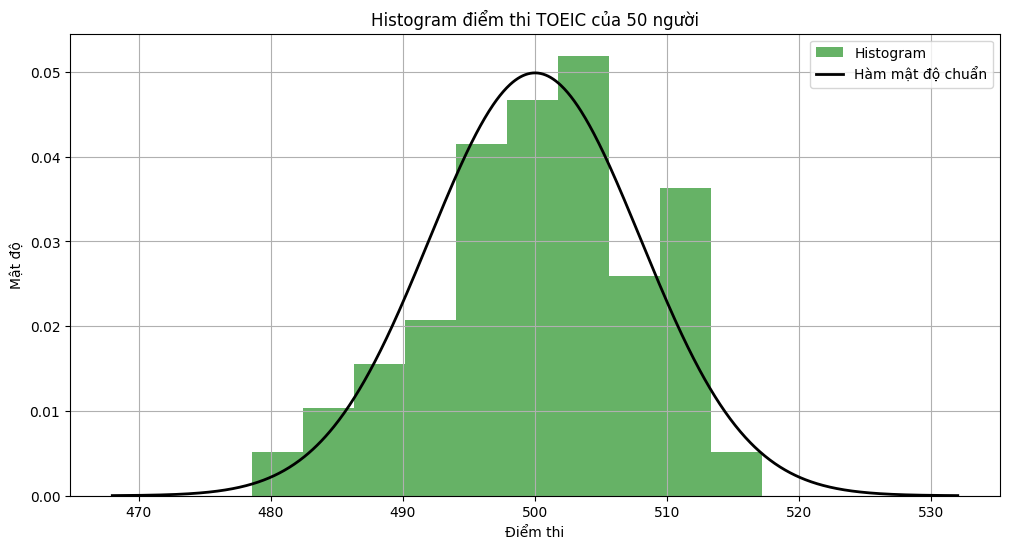

Điểm trung bình (50 người): 500.40
Độ lệch chuẩn (50 người): 8.18
Miền giá trị (50 người): [478.60, 517.14]
Miền phân vị (IQR) (50 người): 10.32
Tỷ lệ đạt trên 450 điểm (50 người): 100.00%

Điểm trung bình (100 người): 499.28
Độ lệch chuẩn (100 người): 8.20
Tỷ lệ đạt trên 450 điểm (100 người): 100.00%


In [14]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Tham số của phân phối chuẩn
mu = 500  # Kỳ vọng
sigma = 8  # Độ lệch chuẩn

# a. Mô phỏng ngẫu nhiên điểm thi TOEIC của 50 người
group_50 = np.random.normal(mu, sigma, 50)

# b. Tính điểm trung bình và độ lệch chuẩn
mean_score_50 = np.mean(group_50)
std_score_50 = np.std(group_50, ddof=1)

# c. Tìm miền giá trị và miền phân vị (IQR)
min_value_50 = np.min(group_50)
max_value_50 = np.max(group_50)
Q1_50 = np.percentile(group_50, 25)
Q3_50 = np.percentile(group_50, 75)
IQR_50 = Q3_50 - Q1_50

# d. Tỷ lệ đạt trên 450 điểm
passing_rate_50 = np.mean(group_50 > 450)

# e. Vẽ histogram và hàm mật độ
plt.figure(figsize=(12, 6))
plt.hist(group_50, bins=10, density=True, alpha=0.6, color='g', label='Histogram')

# Hàm mật độ chuẩn
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'k', linewidth=2, label='Hàm mật độ chuẩn')

plt.title('Histogram điểm thi TOEIC của 50 người')
plt.xlabel('Điểm thi')
plt.ylabel('Mật độ')
plt.legend()
plt.grid()
plt.show()

# In kết quả
print(f"Điểm trung bình (50 người): {mean_score_50:.2f}")
print(f"Độ lệch chuẩn (50 người): {std_score_50:.2f}")
print(f"Miền giá trị (50 người): [{min_value_50:.2f}, {max_value_50:.2f}]")
print(f"Miền phân vị (IQR) (50 người): {IQR_50:.2f}")
print(f"Tỷ lệ đạt trên 450 điểm (50 người): {passing_rate_50:.2%}")

# f. Mô phỏng nhóm với 100 người
group_100 = np.random.normal(mu, sigma, 100)

# Tính toán cho nhóm 100 người
mean_score_100 = np.mean(group_100)
std_score_100 = np.std(group_100, ddof=1)
passing_rate_100 = np.mean(group_100 > 450)

# In kết quả cho nhóm 100 người
print(f"\nĐiểm trung bình (100 người): {mean_score_100:.2f}")
print(f"Độ lệch chuẩn (100 người): {std_score_100:.2f}")
print(f"Tỷ lệ đạt trên 450 điểm (100 người): {passing_rate_100:.2%}")


**Bài 10**

Viết một chương trình để mô phỏng việc tung đồng xu và đánh giá phương sai của giá trị mô phỏng của biến ngẫu nhiên X (tung được mặt `Head`) đối với các số lần tung khác nhau. Giả sử  đồng xu phải cân bằng.

Đối với mỗi N từ 10; 40; 90; 160; 250; 490; 640; 810; 1000, hãy ước tính giá trị của X bằng cách mô phỏng số lần tung đó.

Bạn nên chạy mỗi mô phỏng 100 lần và sử dụng tập hợp các ước tính để đánh giá phương sai của ước tính x của bạn. Vẽ biểu đồ phương sai này so với N, bạn có nhận xét gì không?

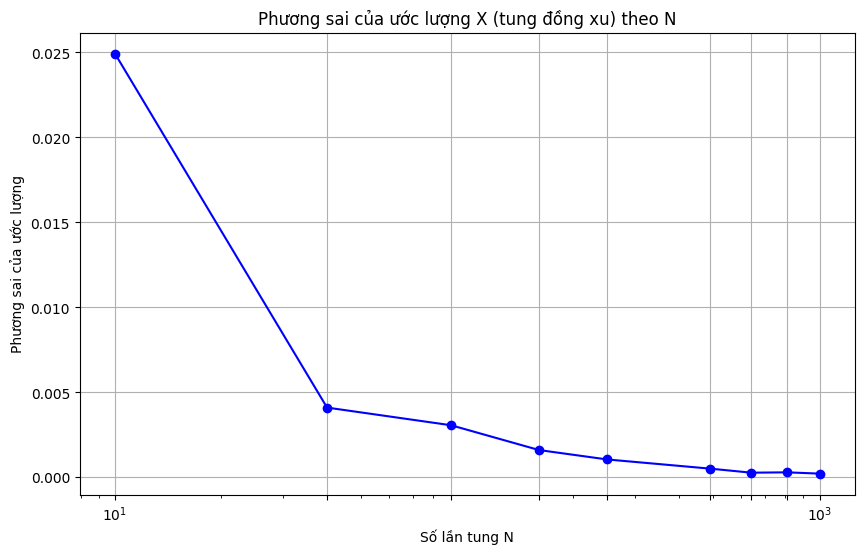

N = 10, Phương sai của ước lượng X: 0.0249
N = 40, Phương sai của ước lượng X: 0.0041
N = 90, Phương sai của ước lượng X: 0.0031
N = 160, Phương sai của ước lượng X: 0.0016
N = 250, Phương sai của ước lượng X: 0.0010
N = 490, Phương sai của ước lượng X: 0.0005
N = 640, Phương sai của ước lượng X: 0.0003
N = 810, Phương sai của ước lượng X: 0.0003
N = 1000, Phương sai của ước lượng X: 0.0002


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Số lần tung đồng xu
N_values = [10, 40, 90, 160, 250, 490, 640, 810, 1000]

# Danh sách để lưu phương sai
variances = []

# Mô phỏng cho mỗi giá trị N
for N in N_values:
    estimates = []

    # Chạy mô phỏng 100 lần
    for _ in range(100):
        # Tung đồng xu N lần (0 là mặt Tail, 1 là mặt Head)
        tosses = np.random.binomial(1, 0.5, N)
        # Tính giá trị ước lượng cho X
        estimate = np.mean(tosses)
        estimates.append(estimate)

    # Tính phương sai của các ước lượng
    variance = np.var(estimates, ddof=1)
    variances.append(variance)

# Vẽ biểu đồ phương sai so với N
plt.figure(figsize=(10, 6))
plt.plot(N_values, variances, marker='o', linestyle='-', color='b')
plt.title('Phương sai của ước lượng X (tung đồng xu) theo N')
plt.xlabel('Số lần tung N')
plt.ylabel('Phương sai của ước lượng')
plt.xscale('log')  # Sử dụng thang đo logarit cho trục x
plt.grid()
plt.xticks(N_values)
plt.show()

# In kết quả phương sai
for N, variance in zip(N_values, variances):
    print(f"N = {N}, Phương sai của ước lượng X: {variance:.4f}")


---